In [25]:
import numpy as np
import math
import pandas as pd
import  matplotlib.pyplot as plt

In [35]:
def split_frame(train):
    y = train['class']
    del train['class']
    return train.to_numpy(), y

In [ ]:
def gaussian_kernel(a, b):
    return 0

In [46]:
def custom_kernel(a,b):
    c = 0.5
    return ((np.transpose(a) * b + c) * (np.transpose(a) * b + c))

In [8]:
def calculate_error(a, x, y, x_set, b, kernel):
    f_xk = (a * y) * kernel(x, x_set) +  b
    return f_xk - y    

In [12]:
def calculate_constrains(C, ai, aj, yi, yj):
    L = max(0, (ai-aj)) if (yi != yj) else max(0, (ai+aj-C))
    H = min(C, (C+aj-ai)) if (yi != yj) else min(C, ai+aj)
    return L, H

In [13]:
def calculate_eta(xi, xj ,kernel):
    eta1 = 2 * kernel(xi,xj)
    eta2 = kernel(xi,xi)
    eta3 = kernel(xj,xj)
    return eta1 - eta2 - eta3

In [14]:
def calculate_aj(aj, yj, error_i, error_j, eta, H, J):
    new_aj = aj - ((yj * (error_i - error_j)) / eta)
    if new_aj > H:
        return H
    elif new_aj < L:
        return L
    else:
        return new_aj

In [16]:
def calculate_ai(ai, yi, yj, a_j_old, aj):
    return ai + yi*yj*(a_j_old - aj)

In [17]:
def calculate_b1(b, error_i, yi, ai, a_i_old, xi, yj, aj, a_j_old, xj, kernel):
    return b - error_i - yi*(ai - a_i_old)*kernel(xi,xi) - yj*(aj - a_j_old)*kernel(xi,xj)

In [18]:
def calculate_b2(b, error_j, yi, ai, ai_old, xi, xj, yj, aj, a_j_old, kernel):
    return b - error_j - yi*(ai - a_i_old)*kernel(xi,xj) - yj*(aj - a_j_old)*kernel(xj,xj)

In [19]:
def simplified_SMO(C, tolerance, max_iterations, train, kernel):
    x, y = split_frame(train)
    train_length = len(x)
    j_tol = 0.000005
    #initialize Lagrange multiplies
    a = np.zeros(train_length)
    b = 0
    number_of_iterations = 0
    while number_of_iterations < max_iterations:
        a_changes = 0
        #iterate over length of training set
        for i in range(0, train_length):
            #calculate the error with the current example
            error_i = calculate_error(x[i], y[i])
            if ((y[i] * error_i) < tolerance * -1 and a[i] < C) or ((y[i] * error_i) > tolerance and a[i] > 0):
                j = get_j(train_length, i)
                a_j_old = a[j]
                a_i_old = a[i]
                L, H = calculate_constraints(C, a[i], a[j], y[i], y[j])
                if L==H:
                    continue
                eta = calculate_eta(x[i],x[j])
                if eta >= 0:
                    continue
                error_j = calcualte_error(x[j], y[j])
                a[j] = calculate_aj(a[j], y[j], error_i, error_j, eta, H, L)
                #if j change is miniscule do not need to update i
                if abs(a[j] - a_j_old) < j_tol:
                    continue
                a[i] = calculate_ai(a[i], y[i], y[j], a_j_old, a_j)
                if (a[i] > 0) and (a[i] < C):
                    b = calculate_b1(b, error_i, y[i], a[i], a_i_old, x[i], y[j], a[j], a_j_old, x[j])
                elif (a[j] > 0) and (a[j] < C):
                    b = calculate_b2(b, error_j, y[i], a[i], a_i_old, x[i], x[j], y[j], a[j], a_j_old)
                else:
                    b1 = calculate_b1(b, error_i, y[i], a[i], a_i_old, x[i], y[j], a[j], a_j_old, x[j])
                    b2 = calculate_b2(b, error_j, y[i], a[i], a_i_old, x[i], x[j], y[j], a[j], a_j_old)
                    b = (b1 + b2) / 2
                a_changes+=1
        #if convergence (i.e. no changes to multipliers throughout entire iteration)
        if a_changes == 0:
            number_of_iterations+=1
        else:
            number_of_iterations=0     
    return a, b

In [42]:
blobs_set = pd.read_csv("blobs.csv")
del blobs_set["Unnamed: 0"]

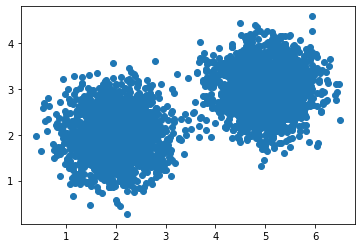

In [34]:
plt.scatter(blobs_set["0"], blobs_set["1"])

In [43]:
data, labels = split_frame(blobs_set)